# TP 4 : Adsorption de particules sur une surface

## 4.1 Surface homogène

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib
from numba import njit

In [11]:
#QUESTION 4.1.1
#Variables globales

L = 20.0
R = 0.4
MAX_TRIES = 1000
N_MAX = int(L**2//(math.pi*(R**2)))

795


In [3]:
@njit
def coord(L,R):
    #retourne un point autorisé dans le cadre
    return R+np.random.rand()*(L-2*R)

@njit
def place_libre(n,x,y,x_new,y_new):
    if n==0:
        return 1
    if n<0:
        print("ERREUR : n négatif")
        return 0 
    
    for i in range(n):
        if np.sqrt(((x_new-x[i])**2)+((y_new-y[i])**2))<(2*R):
            return 0
    return 1
    
@njit
def remplissage(L, R, MAX_TRIES):
    # créer tableaux numpy x et y pour coordonnées des cercles

    n = 0
    x = np.empty(N_MAX)
    y = np.empty(N_MAX)
    echecs = 0
    
    while echecs < MAX_TRIES:
    # tirage aléatoire de coordonnées pour placer un nouveau cercle
        
        x_new = coord(L, R)
        y_new = coord(L, R)
        
        # Test si l’emplacement est libre:
        libre = place_libre(n, x, y, x_new, y_new)
        
        # Ajout de cercle si emplacement libre
        if libre == 1:
            x[n] = x_new
            y[n] = y_new
            n+=1
        
            # ajout du nouveau cercle dans les tableaux numpy x et y
            echecs = 0 # remettre le compteur à zéro pour le prochain cercle
        else:
            echecs += 1 #incrémenter échecs
    
    # fin boucle while
    return x[:n], y[:n], n # retourner la partie des tableaux x
    #et y qui a été remplie et le nombre de cercles adsorbés


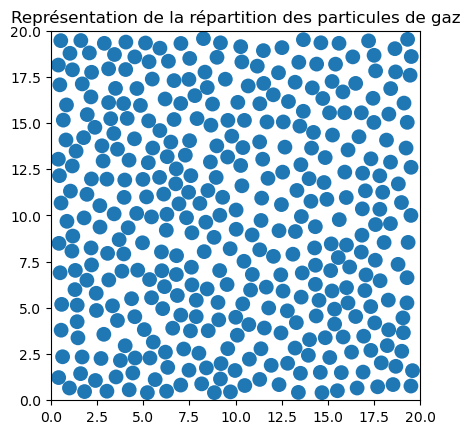

In [4]:
#Question 4.1.2

#appel fonction remplissage
x,y,n = remplissage(L,R,MAX_TRIES)


# crée une liste d’objets "Circle" de matplotlib avec les 
#coordonnées extraites des tableaux x et y :
circles = [plt.Circle((xi,yi), radius=R, linewidth=0, color='b') for xi,yi in zip(x,y)]

# crée une "collection" des cercles pour matplotlib, afin de
#tracer tous les cercles d’un seul coup (c’est mieux au
#niveau temps de calcul):
c = matplotlib.collections.PatchCollection(circles)

plt.title("Représentation de la répartition des particules de gaz")
plt.scatter(x,y,s=1) # nécessaire pour avoir les bons axes
plt.axis('scaled') # pour un avoir un carré et pas un rectangle
plt.xlim(0, L)
plt.ylim(0, L)

plt.gca().add_collection(c) # tracer la collection de cercles
plt.savefig("graph02.png", bbox_inches='tight')
plt.show()

#print("Nombre de particules placées : "+str(n))
#print("Rapport entre la surface totale occupée par toutes les particules adsorbées et la surface du carré : ",str(n/N_MAX))


In [5]:
#Question 4.1.3

@njit
def remplissage_mult(M,L, R, MAX_TRIES):
    moy_array = np.empty(M)
    
    for m in range(M):
        # créer tableaux numpy x et y pour coordonnées des cercles
        n = 0
        x = np.empty(N_MAX)
        y = np.empty(N_MAX)
        echecs = 0

        while echecs < MAX_TRIES:
        # tirage aléatoire de coordonnées pour placer un nouveau cercle

            x_new = coord(L, R)
            y_new = coord(L, R)

            # Test si l’emplacement est libre:
            libre = place_libre(n, x, y, x_new, y_new)

            # Ajout de cercle si emplacement libre
            if libre == 1:
                x[n] = x_new
                y[n] = y_new
                n+=1

                # ajout du nouveau cercle dans les tableaux numpy x et y
                echecs = 0 # remettre le compteur à zéro pour le prochain cercle
            else:
                echecs += 1 #incrémenter échecs

        # fin boucle while
        #ajout sur une itération
        moy_array[m] = n
    
    moyenne = np.mean(moy_array)
    ecartype = np.std(moy_array)
    moy_frac = np.mean(moy_array/N_MAX)
    ect_frac = np.std(moy_array/N_MAX)
    return moyenne, ecartype,moy_frac,ect_frac
    

In [9]:
M = 20

moyenne,ect,moy_frac,ect_frac = remplissage_mult(M,L,R,MAX_TRIES)
print("Moyenne du nombre de particules absorbées : "+str(moyenne)+"±"+str(ect)) 
print("Moyenne de la fraction de surface : "+str(moy_frac)+"±"+str(ect_frac)) 

Moyenne du nombre de particules absorbées : 373.35±6.806430782723059
Moyenne de la fraction de surface : 0.46962264150943406±0.008561548154368622


In [19]:
#Question 4.1.4
#faut calculer la fraction
#On prend le nombre de points possibles a partir de 0.4 pour arriver à 19.6 : (L-R)/2R
#On met cette valeur au carré pour avoir le nombre de points sur cette surface de manière optimale
#On divise par N_MAX pour obtenir la fraction de surface


moyenne_ideal = int((((L-R)/(2*R))**2))/N_MAX
print(moyenne_ideal)

0.7547169811320755


## 4.2 Surface structurée

In [20]:
#QUestion 4.2.5
#T=0 correspondrait à un modèle où tous les particules de gaz
#s'alignerait sur les atomes parfaitement

In [21]:
#Question 4.2.6

#Paramètres globaux :
r_surf = 0.05
U = 10.0

In [22]:
@njit
def dist_latt(x_new,y_new):
    atom = np.rint(np.array([x_new,y_new]))
    return np.sqrt(((x_new-atom[0])**2)+((y_new-atom[1])**2))

@njit
def remplissage_v2(L, R, MAX_TRIES,T):
    # créer tableaux numpy x et y pour coordonnées des cercles
    n = 0
    x = np.empty(N_MAX)
    y = np.empty(N_MAX)
    echecs = 0

    while echecs < MAX_TRIES:
    # tirage aléatoire de coordonnées pour placer un nouveau cercle

        x_new = coord(L, R)
        y_new = coord(L, R)

        # Test si l’emplacement est libre:
        libre = place_libre(n, x, y, x_new, y_new)

        # Ajout de cercle si emplacement libre
        if libre == 1:
            dist = dist_latt(x_new,y_new)
            if ((dist<r_surf) or ((dist>=r_surf and T*np.log(np.random.rand())<-U))):
                x[n] = x_new
                y[n] = y_new
                n+=1

            # ajout du nouveau cercle dans les tableaux numpy x et y
            echecs = 0 # remettre le compteur à zéro pour le prochain cercle
        else:
            echecs += 1 #incrémenter échecs

    return x[:n], y[:n], n

In [23]:
#Simulation avec T = 0 ET MAX_TRIES = 10000
x0,y0,n0=remplissage_v2(L,R,10000,0)

T_table=[0,1,2,5,10]

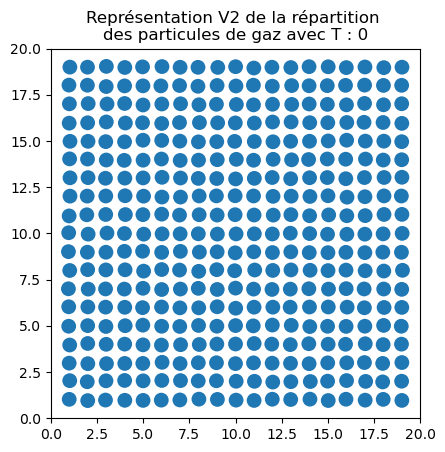

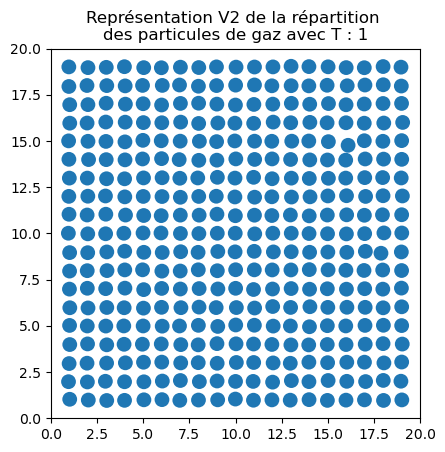

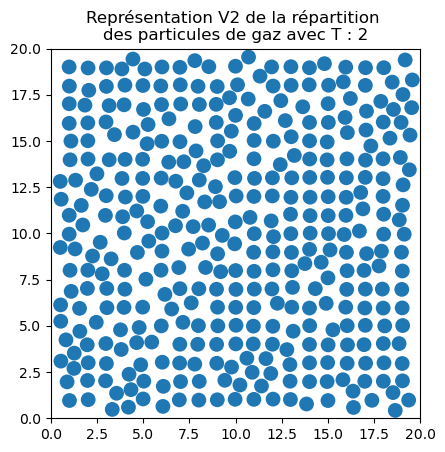

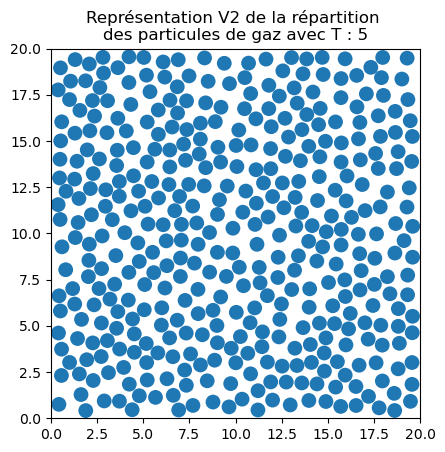

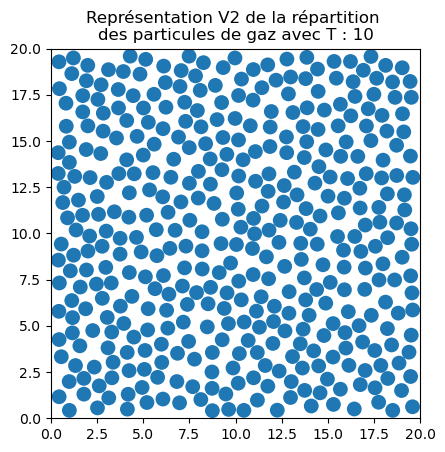

In [24]:
#Question 4.2.7

for i in range(len(T_table)):
    x,y,n = remplissage_v2(L,R,10000,T_table[i])

    circles = [plt.Circle((xi,yi), radius=R, linewidth=0, color='b') for xi,yi in zip(x,y)]

    c = matplotlib.collections.PatchCollection(circles)

    plt.title("Représentation V2 de la répartition \ndes particules de gaz avec T : "+str(T_table[i]))
    plt.scatter(x,y,s=1) 
    plt.axis('scaled') 
    plt.xlim(0, L)
    plt.ylim(0, L)

    plt.gca().add_collection(c)
    plt.savefig("graph427_"+str(i)+".png", bbox_inches='tight')
    plt.show()

In [25]:
#Question 4.2.8

@njit
def remplissage_mult_v2(M,L, R, MAX_TRIES,Tbasse,Thaute,dt):
    Temp = np.arange(Tbasse,Thaute,dt)
    Tmoy = np.empty(len(Temp))
    
    for T in range(len(Temp)):
        moy = np.empty(M)
        for m in range(M):
            # créer tableaux numpy x et y pour coordonnées des cercles
            n = 0
            x = np.empty(N_MAX)
            y = np.empty(N_MAX)
            echecs = 0

            while echecs < MAX_TRIES:
            # tirage aléatoire de coordonnées pour placer un nouveau cercle

                x_new = coord(L, R)
                y_new = coord(L, R)

                # Test si l’emplacement est libre:
                libre = place_libre(n, x, y, x_new, y_new)

                # Ajout de cercle si emplacement libre
                if libre == 1:
                    dist = dist_latt(x_new,y_new)
                    if ((dist<r_surf) or ((dist>=r_surf and Temp[T]*np.log(np.random.rand())<-U))):
                        x[n] = x_new
                        y[n] = y_new
                        n+=1

                    # ajout du nouveau cercle dans les tableaux numpy x et y
                    echecs = 0 # remettre le compteur à zéro pour le prochain cercle
                else:
                    echecs += 1 #incrémenter échecs
            moy[m]=n
        Tmoy[T] = np.mean(moy/N_MAX)

    return Temp,Tmoy

In [26]:
#Calcul
xtemp,tmoy = remplissage_mult_v2(100,L,R,1000,0,10,0.5)

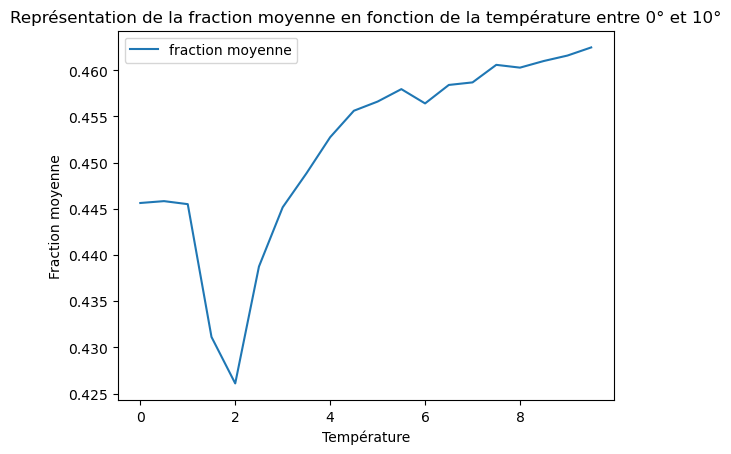

In [27]:
#Tracé du graphe

plt.title("Représentation de la fraction moyenne en fonction de la température entre 0° et 10°")
plt.plot(xtemp, tmoy,label = "fraction moyenne")
plt.xlabel("Température")
plt.ylabel("Fraction moyenne")
plt.legend()
plt.savefig("frac.png")
plt.show()

In [28]:
#Question 4.2.9
#Valeur température basse 0.425

In [29]:
#Question 4.2.10
@njit
def remplissage_mult_v13(M,L, R, MAX_TRIES,doubling):
    mt_list =[MAX_TRIES]
    for i in range(doubling):
        mt_list.append(mt_list[i]*2)
    
    mt_moy = np.empty(len(mt_list))
    mt_std = np.empty(len(mt_list))
    
    for maxi in range(len(mt_list)):
    
        moy_array = np.empty(M)
    
        for m in range(M):
            # créer tableaux numpy x et y pour coordonnées des cercles
            n = 0
            x = np.empty(N_MAX)
            y = np.empty(N_MAX)
            echecs = 0

            while echecs < mt_list[maxi]:
            # tirage aléatoire de coordonnées pour placer un nouveau cercle

                x_new = coord(L, R)
                y_new = coord(L, R)

                # Test si l’emplacement est libre:
                libre = place_libre(n, x, y, x_new, y_new)

                # Ajout de cercle si emplacement libre
                if libre == 1:
                    x[n] = x_new
                    y[n] = y_new
                    n+=1

                    # ajout du nouveau cercle dans les tableaux numpy x et y
                    echecs = 0 # remettre le compteur à zéro pour le prochain cercle
                else:
                    echecs += 1 #incrémenter échecs

            # fin boucle while
            #ajout sur une itération
            moy_array[m] = n
    

        mt_moy[maxi] = np.mean(moy_array/N_MAX)
        mt_std[maxi] = np.std(moy_array/N_MAX)
    
    return mt_moy,mt_std,mt_list



In [30]:
#Calcul
mtmoy,mtstd,mtlist = remplissage_mult_v13(20,L,R,1000,5)

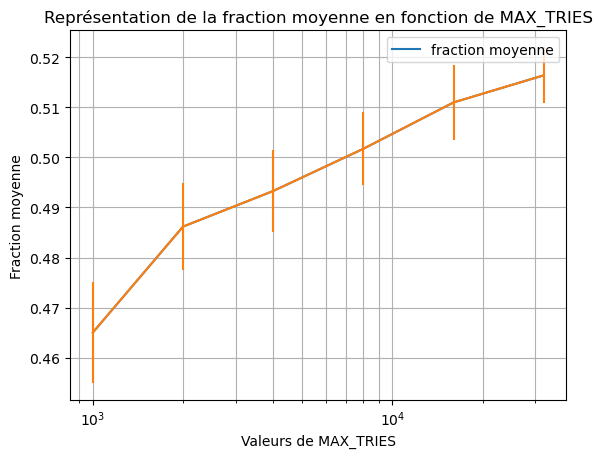

In [31]:
#Tracé du graphe

plt.title("Représentation de la fraction moyenne en fonction de MAX_TRIES")
plt.semilogx(mtlist, mtmoy,label = "fraction moyenne")
plt.xlabel("Valeurs de MAX_TRIES")
plt.ylabel("Fraction moyenne")
plt.errorbar(mtlist, mtmoy, yerr = mtstd)
plt.grid(True, which="both")
plt.legend()
plt.savefig("frac31.png")
plt.show()



In [32]:
#Question 4.2.11
mtmoy2,mtstd2,mtlist2 = remplissage_mult_v13(100,L,R,1000,9)

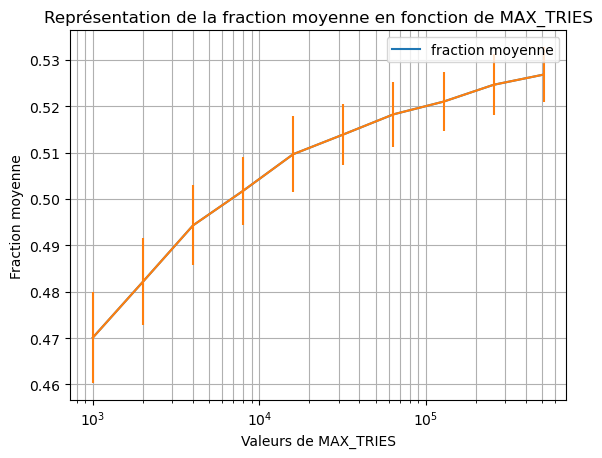

In [38]:
#Tracé du graphe

plt.title("Représentation de la fraction moyenne en fonction de MAX_TRIES")
plt.semilogx(mtlist2, mtmoy2,label = "fraction moyenne")
plt.xlabel("Valeurs de MAX_TRIES")
plt.ylabel("Fraction moyenne")
plt.errorbar(mtlist2, mtmoy2, yerr = mtstd2)
plt.grid(True, which="both")
plt.legend()
plt.savefig("frac32.png")
plt.show()
